General Requirements

- Data for stocks should be retrieved from finance.yahoo.com
- Pandas and Numpy should be used as much as possible for computation purposes
- As many notations as possible to explain each step in calculations
- Each step (including intermediary step) should be ‘shown’ in the Pandas dataframe
- Matplotlib should be used to show all charts

Data Source and Charts

- Stock data should be pulled from finance.yahoo
- Before the indicator calculation, a stock’s chart with candles and volume should be created and shown in the notebook
- After a technical indicator is created, it will be added to the stock’s chart
- Each buy and sell signal should be also shown on the chart


Calculation Logic

- Each step in calculations of the technical indicators should be explicitly shown
- Each calculation should be manifested in Pandas dataframes
- Sometimes, technical indicators might be accompanied by additional simple indicators such as Moving Averages or Bollinger Bands
- Each indicator should have a bullish and bearish entry and exit rules clearly defined, for example for a bullish RSI-based ‘buying a dip’ strategy:
    - Entry Rule – if the closing price is greater than its 50 day exponential moving average and the Relative Strength Index is < 30
    - Exit Rule – if the RSI crosses 50


Trading Performance

- The trading strategy
    - the starting capital is $100K
    - Once the indicator flashes a buy signal, the entire capital is invested into the stock
    - Once the indicator gets into a sell mode, the trade is exited
    - No transaction fee assumption applies
- Each notebook should calculate and show the following performance indicators
    - Total Return (e.g., Total Return is 89%)
    - Annual returns (e.g., 2011 Return is 24%, 2012 Return is 14%, etc)
    - Total number of bullish and bearish trades
    - Total number of bullish and bearish wins
    - Total number of bullish and bearish losses
    - Win ratio
    - Maximum drawdown
    - Sharpe ratio
- And have the following 2 charts
    - Stock chart with each bullish and bearish trade entry and exit points
    - Equity curve for the strategy compared to buy and hold strategy

Indicators

- AROON
- ADX
- Vortex
- MACD
- Bollinger Bands

In [4]:
import pandas as pd
from pandas_datareader import data
import numpy as np

import datetime

import matplotlib
import matplotlib.colors as colors
import matplotlib.finance as finance
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [5]:
today = enddate = datetime.date.today()
startdate = enddate - datetime.timedelta(days=240)# datetime.date(2006, 1, 1)
asset = 'AAPL'

In [6]:
# Spec: Stock data should be pulled from finance.yahoo
ticker = data.DataReader(asset, data_source='yahoo', start=startdate, end=enddate)
print(ticker.head())

# Add a new version of the date index for plotting
# convert the datetime64 column in the dataframe to 'float days'
ticker['NumDate'] = mdates.date2num(ticker.index.to_pydatetime())

                  Open        High         Low       Close     Volume  \
Date                                                                    
2016-04-22  105.010002  106.480003  104.620003  105.680000   33683100   
2016-04-25  105.000000  105.650002  104.510002  105.080002   28031600   
2016-04-26  103.910004  105.300003  103.910004  104.349998   56016200   
2016-04-27   96.000000   98.709999   95.680000   97.820000  114602100   
2016-04-28   97.610001   97.879997   94.250000   94.830002   82242700   

             Adj Close  
Date                    
2016-04-22  103.940854  
2016-04-25  103.350729  
2016-04-26  102.632739  
2016-04-27   96.210203  
2016-04-28   93.269411  


In [7]:
# Spec: Each step in calculations of the technical indicators should be explicitly shown
# Define the indicator using functions:
def moving_average(x, n, type='simple'):
    """
    compute an n period moving average.

    type is 'simple' | 'exponential'

    """
    x = np.asarray(x)
    if type == 'simple':
        weights = np.ones(n)
    else:
        weights = np.exp(np.linspace(-1., 0., n))

    weights /= weights.sum()

    a = np.convolve(x, weights, mode='full')[:len(x)]
    a[:n] = a[n]
    return a

def moving_average_convergence(x, nslow=26, nfast=12):
    """
    compute the MACD (Moving Average Convergence/Divergence) using a fast and slow exponential moving avg'
    return value is emaslow, emafast, macd which are len(x) arrays
    """
    emaslow = moving_average(x, nslow, type='exponential')
    emafast = moving_average(x, nfast, type='exponential')
    return emaslow, emafast, emafast - emaslow


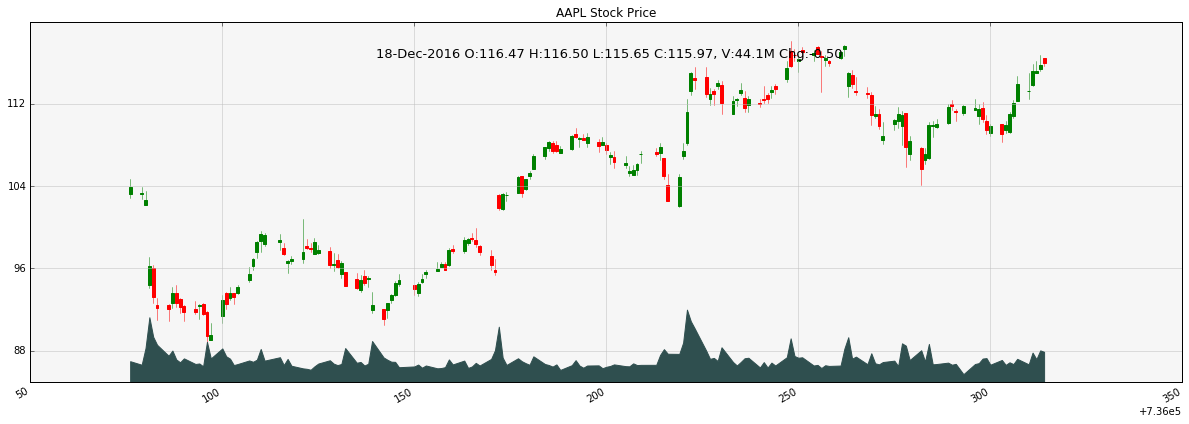

In [9]:
# First we plot our asset's prices

plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)

textsize = 13
left, width = 0.1, 0.8
# rect1 = [left, 0.7, width, 0.2]
rect2 = [left, 0.3, width, 0.5]
# rect3 = [left, 0.1, width, 0.2]


fig = plt.figure(facecolor='white')
axescolor = '#f6f6f6'  # the axes background color
fillcolor = 'darkslategrey'

# ax1 = fig.add_axes(rect1, axisbg=axescolor)  # left, bottom, width, height
ax2 = fig.add_axes(rect2, axisbg=axescolor)#, sharex=ax1)
ax2t = ax2.twinx()
# ax3 = fig.add_axes(rect3, axisbg=axescolor, sharex=ax2)


# plot the relative strength indicator
prices = ticker["Adj Close"] #.adj_close
# rsi = relative_strength(prices)
# fillcolor = 'darkgoldenrod'

# ax1.plot(r.date, rsi, color=fillcolor)
#ax1.axhline(70, color=fillcolor)
#ax1.axhline(30, color=fillcolor)
#ax1.fill_between(r.date, rsi, 70, where=(rsi >= 70), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.fill_between(r.date, rsi, 30, where=(rsi <= 30), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.text(0.6, 0.9, '>70 = overbought', va='top', transform=ax1.transAxes, fontsize=textsize)
#ax1.text(0.6, 0.1, '<30 = oversold', transform=ax1.transAxes, fontsize=textsize)
#ax1.set_ylim(0, 100)
#ax1.set_yticks([30, 70])
#ax1.text(0.025, 0.95, 'RSI (14)', va='top', transform=ax1.transAxes, fontsize=textsize)
ax2.set_title('%s Stock Price' % asset)

# plot the price and volume data
dx = ticker["Adj Close"] - ticker["Close"]
close = ticker["Close"] + dx
low = ticker["Low"] + dx
high = ticker["High"] + dx
open = ticker["Open"] + dx

candlestick_prices = zip(ticker["NumDate"], open, high, low, close)

deltas = np.zeros_like(prices)
deltas[1:] = np.diff(prices)
up = deltas > 0
matplotlib.finance.candlestick_ohlc(ax2, candlestick_prices, width = 0.75 , colorup = 'g', colordown = 'r')
# ax2.vlines(ticker["NumDate"][up], low[up], high[up], color='green', label='_nolegend_')
# ax2.vlines(ticker["NumDate"][~up], low[~up], high[~up], color='red', label='_nolegend_')
# ma20 = moving_average(prices, 20, type='simple')
# ma200 = moving_average(prices, 200, type='simple')

# linema20, = ax2.plot(r.date, ma20, color='blue', lw=2, label='MA (20)')
# linema200, = ax2.plot(r.date, ma200, color='red', lw=2, label='MA (200)')


last = ticker.tail(1)
s = '%s O:%1.2f H:%1.2f L:%1.2f C:%1.2f, V:%1.1fM Chg:%+1.2f' % (
    today.strftime('%d-%b-%Y'),
    last["Open"], last["High"],
    last["Low"], last["Close"],
    last["Volume"]*1e-6,
    last["Close"] - last["Open"])
t4 = ax2.text(0.3, 0.9, s, transform=ax2.transAxes, fontsize=textsize)

props = font_manager.FontProperties(size=10)
# leg = ax2.legend(loc='center left', shadow=True, fancybox=True, prop=props)
# leg.get_frame().set_alpha(0.5)


volume = (ticker["Adj Close"]*ticker["Volume"])/1e6  # dollar volume in millions
vmax = volume.max()
poly = ax2t.fill_between(ticker["NumDate"], volume, 0, label='Volume', facecolor=fillcolor, edgecolor=fillcolor)
ax2t.set_ylim(0, 5*vmax)
ax2t.set_yticks([])


# compute the MACD indicator
# nslow = 26
# nfast = 12
# signal_length = 9
# emaslow, emafast, macd = moving_average_convergence(prices, nslow=nslow, nfast=nfast)
# ema9 = moving_average(macd, nema, type='exponential')
# ax3.plot(ticker["NumDate"], macd, color='black', lw=2)
# ax3.plot(ticker["NumDate"], macd_signal, color='blue', lw=1)
# ax3.fill_between(ticker["NumDate"], macd - macd_signal, 0, alpha=0.5, facecolor=fillcolor, edgecolor=fillcolor)


# ax3.text(0.025, 0.95, 'MACD (%d, %d, %d)' % (nfast, nslow, signal_length), va='top',
#          transform=ax3.transAxes, fontsize=textsize)

#ax3.set_yticks([])
# turn off upper axis tick labels, rotate the lower ones, etc
for ax in ax2, ax2t: # , ax3 #ax1, 
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


class MyLocator(mticker.MaxNLocator):
    def __init__(self, *args, **kwargs):
        mticker.MaxNLocator.__init__(self, *args, **kwargs)

    def __call__(self, *args, **kwargs):
        return mticker.MaxNLocator.__call__(self, *args, **kwargs)

# at most 5 ticks, pruning the upper and lower so they don't overlap
# with other ticks
#ax2.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))
#ax3.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))

ax2.yaxis.set_major_locator(MyLocator(5, prune='both'))
# ax3.yaxis.set_major_locator(MyLocator(5, prune='both'))

plt.show()

In [10]:
# Spec: Each calculation should be manifested in Pandas dataframes
# Define the indicator parameters for simulation
prices = ticker["Adj Close"]
nslow = 26
nfast = 12
signal_length = 9

# Compute the indicator values (intermediate and final)
emaslow, emafast, macd = moving_average_convergence(prices, nslow=nslow, nfast=nfast)
macd_signal = moving_average(macd, signal_length, type='exponential')

# Add indicator values to DataFrame
ticker["EMA_slow"] = emaslow
ticker["EMA_fast"] = emafast
ticker["MACD"] = macd
ticker["MACD_signal"] = macd_signal
ticker.tail()

,Open,High,Low,Close,Volume,Adj Close,NumDate,EMA_slow,EMA_fast,MACD,MACD_signal
Date,,,,,,,,,,,
2016-12-12,113.290001,115.000000,112.489998,113.300003,26149100,113.300003,736310,110.086248,111.061886,0.975638,0.122486
2016-12-13,113.839996,115.919998,113.750000,115.190002,43167500,115.190002,736311,110.278780,111.156264,0.877484,0.497721
2016-12-14,115.040001,116.199997,114.980003,115.190002,33433200,115.190002,736312,110.380069,111.291152,0.911083,0.726190
2016-12-15,115.379997,116.730003,115.230003,115.820000,46232200,115.820000,736313,110.458519,111.484968,1.026449,0.849785
2016-12-16,116.470001,116.500000,115.650002,115.970001,44055400,115.970001,736314,110.554879,111.839161,1.284282,0.952250


In [11]:
# Here we will define the strategy to be tested: long-only MACD
# The strategy is composed of:
#    Outlook: whether the market is bullish, bearish, or neutral
#    Signal: the order to buy or sell

# Spec: Each indicator should have a bullish and bearish entry and exit rules clearly defined
# Define how signals are calculated
def define_outlook(ticker):
    # Default to Hold signal (other options are Buy or Sell)
    ticker["Outlook"] = "Neutral"
    # For now, signal on every crossover. Could be more specific if preferred
    ticker.loc[ticker["MACD"] >= ticker["MACD_signal"],"Outlook"] = "Bull"
    ticker.loc[ticker["MACD"] < ticker["MACD_signal"],"Outlook"] = "Bear"
    
    # Shift the signal by 1 day to avoid look-ahead bias
    ticker.loc[:,"Outlook"] = ticker["Outlook"].shift().fillna("Neutral")
    
    return ticker

# Define how outlook is turned into trade recommendations
def define_signal(ticker):
    # Recode Bull=1, Bear=-1, Neutral=0
    outlook_temp = ticker["Outlook"].replace("Bull",1)
    outlook_temp = outlook_temp.replace("Bear",-1)
    outlook_temp = outlook_temp.replace("Neutral",0)
    trades = outlook_temp.diff().fillna(0)
    # define how trades should happen based on the signal given
    ticker.loc[trades > 0,"Trade"] = "Buy"
    ticker.loc[trades < 0, "Trade"] = "Sell"
    ticker["Trade"] = ticker["Trade"].fillna("Hold")
    return ticker
    
    
# Translate indicator values into bullish/bearish signals
ticker = define_outlook(ticker)
ticker = define_signal(ticker)

ticker.head()

,Open,High,Low,Close,Volume,Adj Close,NumDate,EMA_slow,EMA_fast,MACD,MACD_signal,Outlook,Trade
Date,,,,,,,,,,,,,
2016-04-22,105.010002,106.480003,104.620003,105.680000,33683100,103.940854,736076,94.628029,95.548335,0.920306,0.920306,Neutral,Hold
2016-04-25,105.000000,105.650002,104.510002,105.080002,28031600,103.350729,736079,94.628029,95.548335,0.920306,0.920306,Bull,Buy
2016-04-26,103.910004,105.300003,103.910004,104.349998,56016200,102.632739,736080,94.628029,95.548335,0.920306,0.920306,Bull,Hold
2016-04-27,96.000000,98.709999,95.680000,97.820000,114602100,96.210203,736081,94.628029,95.548335,0.920306,0.920306,Bull,Hold
2016-04-28,97.610001,97.879997,94.250000,94.830002,82242700,93.269411,736082,94.628029,95.548335,0.920306,0.920306,Bull,Hold


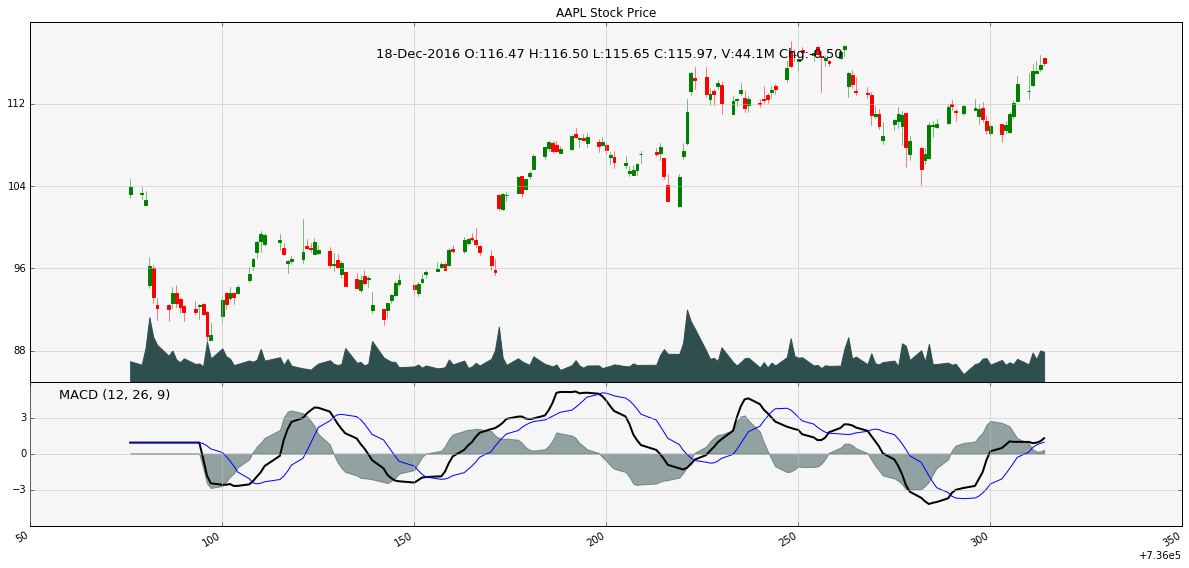

In [12]:
# Next we plot the indicator against our asset's prices

plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)

textsize = 13
left, width = 0.1, 0.8
# rect1 = [left, 0.7, width, 0.2]
rect2 = [left, 0.3, width, 0.5]
rect3 = [left, 0.1, width, 0.2]


fig = plt.figure(facecolor='white')
axescolor = '#f6f6f6'  # the axes background color
fillcolor = 'darkslategrey'

# ax1 = fig.add_axes(rect1, axisbg=axescolor)  # left, bottom, width, height
ax2 = fig.add_axes(rect2, axisbg=axescolor)#, sharex=ax1)
ax2t = ax2.twinx()
ax3 = fig.add_axes(rect3, axisbg=axescolor, sharex=ax2)


# plot the relative strength indicator
prices = ticker["Adj Close"] #.adj_close
# rsi = relative_strength(prices)
# fillcolor = 'darkgoldenrod'

# ax1.plot(r.date, rsi, color=fillcolor)
#ax1.axhline(70, color=fillcolor)
#ax1.axhline(30, color=fillcolor)
#ax1.fill_between(r.date, rsi, 70, where=(rsi >= 70), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.fill_between(r.date, rsi, 30, where=(rsi <= 30), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.text(0.6, 0.9, '>70 = overbought', va='top', transform=ax1.transAxes, fontsize=textsize)
#ax1.text(0.6, 0.1, '<30 = oversold', transform=ax1.transAxes, fontsize=textsize)
#ax1.set_ylim(0, 100)
#ax1.set_yticks([30, 70])
#ax1.text(0.025, 0.95, 'RSI (14)', va='top', transform=ax1.transAxes, fontsize=textsize)
ax2.set_title('%s Stock Price' % asset)

# plot the price and volume data
dx = ticker["Adj Close"] - ticker["Close"]
close = ticker["Close"] + dx
low = ticker["Low"] + dx
high = ticker["High"] + dx
open = ticker["Open"] + dx

candlestick_prices = zip(ticker["NumDate"], open, high, low, close)

deltas = np.zeros_like(prices)
deltas[1:] = np.diff(prices)
up = deltas > 0
matplotlib.finance.candlestick_ohlc(ax2, candlestick_prices, width = 0.75 , colorup = 'g', colordown = 'r')
# ax2.vlines(ticker["NumDate"][up], low[up], high[up], color='green', label='_nolegend_')
# ax2.vlines(ticker["NumDate"][~up], low[~up], high[~up], color='red', label='_nolegend_')
# ma20 = moving_average(prices, 20, type='simple')
# ma200 = moving_average(prices, 200, type='simple')

# linema20, = ax2.plot(r.date, ma20, color='blue', lw=2, label='MA (20)')
# linema200, = ax2.plot(r.date, ma200, color='red', lw=2, label='MA (200)')


last = ticker.tail(1)
s = '%s O:%1.2f H:%1.2f L:%1.2f C:%1.2f, V:%1.1fM Chg:%+1.2f' % (
    today.strftime('%d-%b-%Y'),
    last["Open"], last["High"],
    last["Low"], last["Close"],
    last["Volume"]*1e-6,
    last["Close"] - last["Open"])
t4 = ax2.text(0.3, 0.9, s, transform=ax2.transAxes, fontsize=textsize)

props = font_manager.FontProperties(size=10)
# leg = ax2.legend(loc='center left', shadow=True, fancybox=True, prop=props)
# leg.get_frame().set_alpha(0.5)


volume = (ticker["Adj Close"]*ticker["Volume"])/1e6  # dollar volume in millions
vmax = volume.max()
poly = ax2t.fill_between(ticker["NumDate"], volume, 0, label='Volume', facecolor=fillcolor, edgecolor=fillcolor)
ax2t.set_ylim(0, 5*vmax)
ax2t.set_yticks([])


# compute the MACD indicator
# nslow = 26
# nfast = 12
signal_length = 9
# emaslow, emafast, macd = moving_average_convergence(prices, nslow=nslow, nfast=nfast)
# ema9 = moving_average(macd, nema, type='exponential')
ax3.plot(ticker["NumDate"], macd, color='black', lw=2)
ax3.plot(ticker["NumDate"], macd_signal, color='blue', lw=1)
ax3.fill_between(ticker["NumDate"], macd - macd_signal, 0, alpha=0.5, facecolor=fillcolor, edgecolor=fillcolor)


ax3.text(0.025, 0.95, 'MACD (%d, %d, %d)' % (nfast, nslow, signal_length), va='top',
         transform=ax3.transAxes, fontsize=textsize)

#ax3.set_yticks([])
# turn off upper axis tick labels, rotate the lower ones, etc
for ax in ax2, ax2t, ax3: #ax1, 
    if ax != ax3:
        for label in ax.get_xticklabels():
            label.set_visible(False)
    else:
        for label in ax.get_xticklabels():
            label.set_rotation(30)
            label.set_horizontalalignment('right')

    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


class MyLocator(mticker.MaxNLocator):
    def __init__(self, *args, **kwargs):
        mticker.MaxNLocator.__init__(self, *args, **kwargs)

    def __call__(self, *args, **kwargs):
        return mticker.MaxNLocator.__call__(self, *args, **kwargs)

# at most 5 ticks, pruning the upper and lower so they don't overlap
# with other ticks
#ax2.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))
#ax3.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))

ax2.yaxis.set_major_locator(MyLocator(5, prune='both'))
ax3.yaxis.set_major_locator(MyLocator(5, prune='both'))

plt.show()

In [13]:
# And finanlly we test the strategy's performance

# Spec: The trading strategy
#    - the starting capital is $100K
#    - Once the indicator flashes a buy signal, the entire capital is invested into the stock
#    - Once the indicator gets into a sell mode, the trade is exited
#    - No transaction fee assumption applies
starting_capital = 100000
# Currently assuming everything is long-only
long_only = True
# Have to use Adjusted Close for accounting due to splits
returns = pd.DataFrame({"Price":ticker["Adj Close"],
                       "Outlook":ticker["Outlook"],
                        "Trade":ticker["Trade"]
                       })


returns["Asset"] = 0
returns.loc[returns["Trade"]=="Buy","Asset"] = 1
returns.loc[returns["Trade"]=="Hold","Asset"] = np.nan
returns["Asset"] = returns["Asset"].ffill().fillna(0)


returns.loc[(returns["Trade"] == "Buy") & (returns["Asset"].shift() == 0), "Trade_Type"] = "Entry"
returns.loc[(returns["Trade"] == "Sell") & (returns["Asset"].shift() == 1), "Trade_Type"] = "Exit"
# Also will introduce short and cover when shorting is introduced

returns["Asset_Returns"] = returns["Price"].pct_change().fillna(0)
returns["Portfolio_Returns"] = returns["Asset_Returns"] * returns["Asset"]
returns["Portfolio_Value"] = starting_capital * returns["Portfolio_Returns"].cumsum()
returns["Buy_And_Hold"] = starting_capital * returns["Asset_Returns"].cumsum()
returns.tail()

,Outlook,Price,Trade,Asset,Trade_Type,Asset_Returns,Portfolio_Returns,Portfolio_Value,Buy_And_Hold
Date,,,,,,,,,
2016-12-12,Bull,113.300003,Hold,1,NaN,-0.005704,-0.005704,-4305.407576,10105.281196
2016-12-13,Bull,115.190002,Hold,1,NaN,0.016681,0.016681,-2637.270815,11773.417957
2016-12-14,Bull,115.190002,Hold,1,NaN,0.000000,0.000000,-2637.270815,11773.417957
2016-12-15,Bull,115.820000,Hold,1,NaN,0.005469,0.005469,-2090.350085,12320.338687
2016-12-16,Bull,115.970001,Hold,1,NaN,0.001295,0.001295,-1960.837911,12449.850861


In [14]:
##### Spec: Each notebook should calculate and show the following performance indicators
#    - Total Return (e.g., Total Return is 89%)
total_return = returns["Portfolio_Returns"].cumsum()[-1]
print("Total Return: "+str(round(total_return*100,2))+"%")
#    - Annual returns (e.g., 2011 Return is 24%, 2012 Return is 14%, etc)
annual_returns = pd.DataFrame(returns["Portfolio_Returns"].groupby([lambda x: x.year]).sum())
print(annual_returns.to_string(formatters={'Portfolio_Returns': '{:,.2%}'.format}))
# Create trade log table
# Ignores final trade if it hasn't been closed out yet
exits = returns[returns["Trade_Type"].isin(["Exit"])]
entries = returns[returns["Trade_Type"].isin(["Entry"])]
entries = entries[0:len(exits)]
trade_log = pd.DataFrame({"Outlook":entries["Outlook"].tolist(),
                          "Entry_Price":entries["Price"].tolist(),
                          "Entry_Date":entries.index.to_pydatetime(),
                          "Exit_Price":exits["Price"].tolist(),
                          "Exit_Date":exits.index.to_pydatetime()
                      })
#    - Total number of bullish and bearish trades
total_bull = sum(trade_log["Outlook"] == "Bull")
total_bear = sum(trade_log["Outlook"] == "Bear") # Has to be 0 because this is a long-only strategy
#    - Total number of bullish and bearish wins
#    - Total number of bullish and bearish losses
bull_wins = sum((trade_log["Exit_Price"] > trade_log["Entry_Price"]) & (trade_log["Outlook"] == "Bull"))
bull_losses = total_bull - bull_wins
bear_wins = sum((trade_log["Exit_Price"] > trade_log["Entry_Price"]) & (trade_log["Outlook"] == "Bear")) # Must be 0 because this is a long-only strategy
bear_losses = total_bear - bear_wins
if not long_only:
    print("Bull Trades (W/L): "+str(total_bull)+" ("+
      str(bull_wins)+"/"+str(bull_losses)+")")
    print("Bear Trades (W/L): "+str(total_bear)+" ("+
      str(bear_wins)+"/"+str(bear_losses)+")")
#    - Win ratio
# Also including total wins and losses
total_trades = len(trade_log)
total_wins = sum(trade_log["Exit_Price"] > trade_log["Entry_Price"])
total_losses = total_trades - total_wins


if total_losses > 0:
    win_ratio = (total_wins) / (total_losses)
else:
    win_ratio = 1000000
print("Win Ratio: "+str(total_wins)+
      ":"+str(total_losses)+" ("+str(round(win_ratio,2))+")")
#    - Maximum drawdown
def max_drawdown_absolute(returns):
    r = returns.add(1).cumprod()
    dd = r.div(r.cummax()).sub(1)
    mdd = dd.min()
    end = dd.argmin()
    start = r.loc[:end].argmax()
    return mdd, start, end

max_drawdown = max_drawdown_absolute(returns["Portfolio_Returns"])[0]
print("Max Drawdown: "+str(round(max_drawdown*100,2))+"%")

#    - Sharpe ratio
trading_days = 252
daily_returns = returns["Portfolio_Returns"]
sharpe_ratio = np.sqrt(trading_days) * daily_returns.mean() / daily_returns.std()
print("Sharpe Ratio: "+str(round(sharpe_ratio*100,2))+"%")

Total Return: -1.96%
     Portfolio_Returns
2016            -1.96%
Win Ratio: 2:3 (0.67)
Max Drawdown: -12.61%
Sharpe Ratio: -18.7%


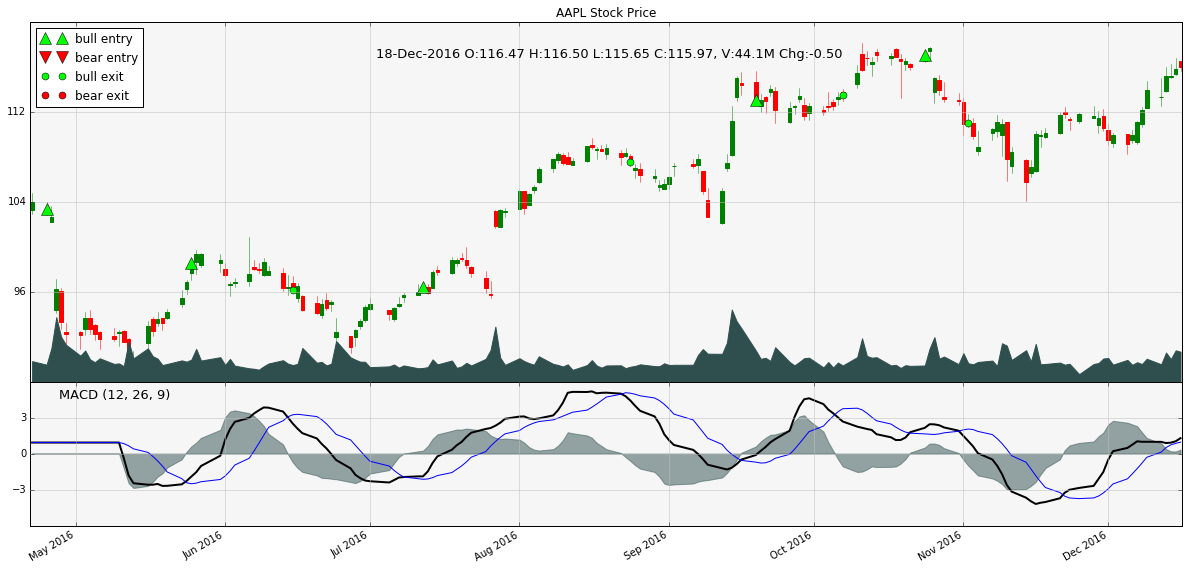

In [15]:
# Spec: And have the following 2 charts
#    - Stock chart with each bullish and bearish trade entry and exit points


plt.rc('axes', grid=True)
plt.rc('grid', color='0.75', linestyle='-', linewidth=0.5)

textsize = 13
left, width = 0.1, 0.8
# rect1 = [left, 0.7, width, 0.2]
rect2 = [left, 0.3, width, 0.5]
rect3 = [left, 0.1, width, 0.2]


fig = plt.figure(facecolor='white')
axescolor = '#f6f6f6'  # the axes background color
fillcolor = 'darkslategrey'

# ax1 = fig.add_axes(rect1, axisbg=axescolor)  # left, bottom, width, height
ax2 = fig.add_axes(rect2, axisbg=axescolor)#, sharex=ax1)
ax2t = ax2.twinx()
ax3 = fig.add_axes(rect3, axisbg=axescolor, sharex=ax2)


# plot the relative strength indicator
prices = ticker["Adj Close"] #.adj_close
# rsi = relative_strength(prices)
# fillcolor = 'darkgoldenrod'

# ax1.plot(r.date, rsi, color=fillcolor)
#ax1.axhline(70, color=fillcolor)
#ax1.axhline(30, color=fillcolor)
#ax1.fill_between(r.date, rsi, 70, where=(rsi >= 70), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.fill_between(r.date, rsi, 30, where=(rsi <= 30), facecolor=fillcolor, edgecolor=fillcolor)
#ax1.text(0.6, 0.9, '>70 = overbought', va='top', transform=ax1.transAxes, fontsize=textsize)
#ax1.text(0.6, 0.1, '<30 = oversold', transform=ax1.transAxes, fontsize=textsize)
#ax1.set_ylim(0, 100)
#ax1.set_yticks([30, 70])
#ax1.text(0.025, 0.95, 'RSI (14)', va='top', transform=ax1.transAxes, fontsize=textsize)
ax2.set_title('%s Stock Price' % asset)

# plot the price and volume data
dx = ticker["Adj Close"] - ticker["Close"]
close = ticker["Close"] + dx
low = ticker["Low"] + dx
high = ticker["High"] + dx
open = ticker["Open"] + dx

candlestick_prices = zip(ticker["NumDate"], open, high, low, close)

deltas = np.zeros_like(prices)
deltas[1:] = np.diff(prices)
up = deltas > 0
matplotlib.finance.candlestick_ohlc(ax2, candlestick_prices, width = 0.75 , colorup = 'g', colordown = 'r')
# ax2.vlines(ticker["NumDate"][up], low[up], high[up], color='green', label='_nolegend_')
# ax2.vlines(ticker["NumDate"][~up], low[~up], high[~up], color='red', label='_nolegend_')
# ma20 = moving_average(prices, 20, type='simple')
# ma200 = moving_average(prices, 200, type='simple')

# linema20, = ax2.plot(r.date, ma20, color='blue', lw=2, label='MA (20)')
# linema200, = ax2.plot(r.date, ma200, color='red', lw=2, label='MA (200)')


last = ticker.tail(1)
s = '%s O:%1.2f H:%1.2f L:%1.2f C:%1.2f, V:%1.1fM Chg:%+1.2f' % (
    today.strftime('%d-%b-%Y'),
    last["Open"], last["High"],
    last["Low"], last["Close"],
    last["Volume"]*1e-6,
    last["Close"] - last["Open"])
t4 = ax2.text(0.3, 0.9, s, transform=ax2.transAxes, fontsize=textsize)

props = font_manager.FontProperties(size=10)
# leg = ax2.legend(loc='center left', shadow=True, fancybox=True, prop=props)
# leg.get_frame().set_alpha(0.5)


volume = (ticker["Adj Close"]*ticker["Volume"])/1e6  # dollar volume in millions
vmax = volume.max()
poly = ax2t.fill_between(ticker["NumDate"], volume, 0, label='Volume', facecolor=fillcolor, edgecolor=fillcolor)
ax2t.set_ylim(0, 5*vmax)
ax2t.set_yticks([])


# compute the MACD indicator
# nslow = 26
# nfast = 12
signal_length = 9
# emaslow, emafast, macd = moving_average_convergence(prices, nslow=nslow, nfast=nfast)
# ema9 = moving_average(macd, nema, type='exponential')
ax3.plot(ticker["NumDate"], macd, color='black', lw=2)
ax3.plot(ticker["NumDate"], macd_signal, color='blue', lw=1)
ax3.fill_between(ticker["NumDate"], macd - macd_signal, 0, alpha=0.5, facecolor=fillcolor, edgecolor=fillcolor)


ax3.text(0.025, 0.95, 'MACD (%d, %d, %d)' % (nfast, nslow, signal_length), va='top',
         transform=ax3.transAxes, fontsize=textsize)

#ax3.set_yticks([])
# turn off upper axis tick labels, rotate the lower ones, etc
for ax in ax2, ax2t, ax3: #ax1, 
    if ax != ax3:
        for label in ax.get_xticklabels():
            label.set_visible(False)
    else:
        for label in ax.get_xticklabels():
            label.set_rotation(30)
            label.set_horizontalalignment('right')

    ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')


class MyLocator(mticker.MaxNLocator):
    def __init__(self, *args, **kwargs):
        mticker.MaxNLocator.__init__(self, *args, **kwargs)

    def __call__(self, *args, **kwargs):
        return mticker.MaxNLocator.__call__(self, *args, **kwargs)

# at most 5 ticks, pruning the upper and lower so they don't overlap
# with other ticks
#ax2.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))
#ax3.yaxis.set_major_locator(mticker.MaxNLocator(5, prune='both'))

ax2.yaxis.set_major_locator(MyLocator(5, prune='both'))
ax3.yaxis.set_major_locator(MyLocator(5, prune='both'))

bull_entry = trade_log[["Entry_Date","Entry_Price"]][trade_log["Outlook"]=="Bull"].set_index("Entry_Date")
bear_entry = trade_log[["Entry_Date","Entry_Price"]][trade_log["Outlook"]=="Bear"].set_index("Entry_Date")

bull_exit = trade_log[["Exit_Date","Exit_Price"]][trade_log["Outlook"]=="Bull"].set_index("Exit_Date")
bear_exit = trade_log[["Exit_Date","Exit_Price"]][trade_log["Outlook"]=="Bear"].set_index("Exit_Date")

ax2.plot(bull_entry.index, bull_entry.values, '^', color='lime', markersize=12,
                   label='bull entry')
ax2.plot(bear_entry.index, bear_entry.values, 'v', color='red', markersize=12,
                   label='bear entry')
ax2.plot(bull_exit.index, bull_exit.values, 'o', color='lime', markersize=7,
                   label='bull exit')
ax2.plot(bear_exit.index, bear_exit.values, 'o', color='red', markersize=7,
                   label='bear exit')

ax2.legend(loc="best")

plt.show()

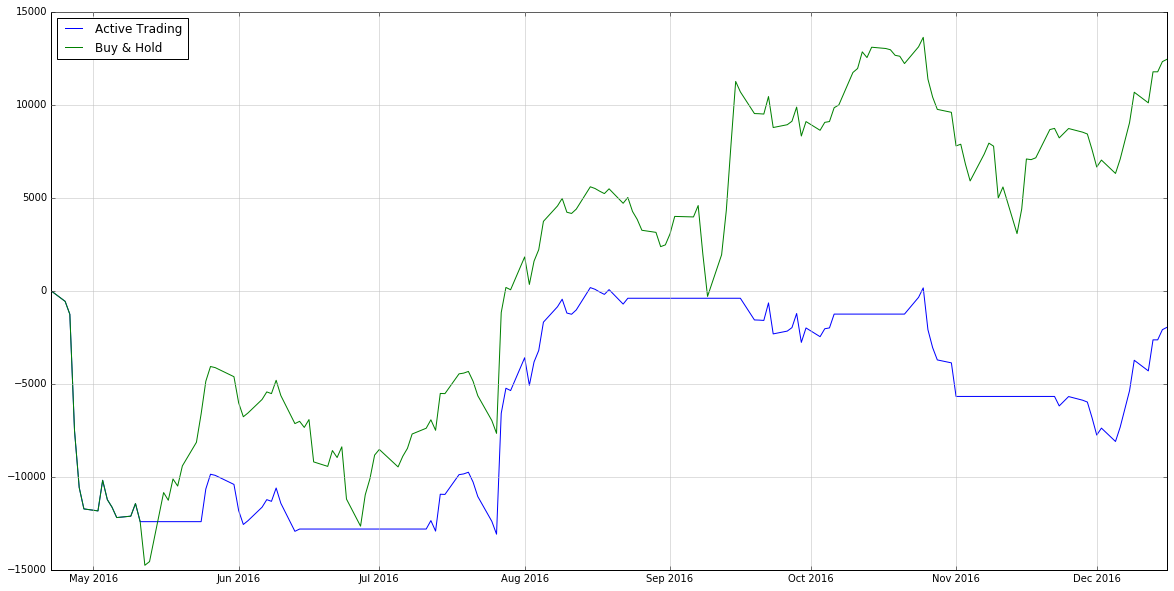

In [16]:
#    - Equity curve for the strategy compared to buy and hold strategy
plt.plot(returns["Portfolio_Value"], label='Active Trading')
plt.plot(returns["Buy_And_Hold"], label='Buy & Hold')
plt.legend(loc="upper left")
plt.show()